# Defined Functions

In [1]:
import ROOT as r

#%jsroot on

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")


cutString_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>2.0) && (vbf_maxpt_jj_m>500) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>400))"

cutString_Signal =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>2.0) && (vbf_maxpt_jj_m>500) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>400))"

Welcome to JupyROOT 6.08/05


In [2]:
def createCanvasPads():
    c = r.TCanvas("c", "canvas", 950, 600)
    # Upper histogram plot is pad1
    pad1 = r.TPad("pad1", "pad1", 0.0, 0.0, 0.5, 1.0)
    pad1.SetTopMargin(0.08)
    pad1.SetBottomMargin(0.15)  # joins upper and lower plot
    pad1.SetLeftMargin(0.15)
    pad1.SetRightMargin(0.01)
    pad1.SetLogy(1)
    pad1.SetGridx()
    pad1.SetTickx(1)
    pad1.SetTicky(1)
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = r.TPad("pad2", "pad2", 0.5, 0.00, 1.0, 1.0)
    #pad2.SetLogy(1)
    pad2.SetTopMargin(0.08)  # joins upper and lower plot
    pad2.SetBottomMargin(0.15)
    pad2.SetLeftMargin(0.15)
    pad2.SetRightMargin(0.00)
    pad2.SetGridx()
    pad2.SetTickx(1)
    pad2.SetTicky(1)
    pad2.Draw()

    return c, pad1, pad2

In [3]:
def get_pull(rrv_x, frame):

    hpull = frame.pullHist()

    x = r.Double(0.); y = r.Double(0.)
    for ipoint in range(0,hpull.GetN()):
        hpull.GetPoint(ipoint,x,y);
        if (y==0):
            hpull.SetPoint(ipoint,x,10)

    gt = r.TH1F("gt","",42,400,2500)
    gt.SetMinimum(-3.999)
    gt.SetMaximum(3.999)
    gt.SetDirectory(0)
    gt.SetStats(0)
    gt.SetLineStyle(0)
    gt.SetMarkerStyle(20)
    gt.GetXaxis().SetTitle(rrv_x.GetTitle())
    gt.GetXaxis().SetLabelFont(42);
    gt.GetXaxis().SetLabelOffset(0.02);
    gt.GetXaxis().SetLabelSize(0.05);
    gt.GetXaxis().SetTitleSize(0.05);
    gt.GetXaxis().SetTitleOffset(1.2);
    gt.GetXaxis().SetTitleFont(42);
    gt.GetYaxis().SetTitle("#frac{Data-Fit}{#sigma_{data}}");
    gt.GetYaxis().CenterTitle(True);
    gt.GetYaxis().SetNdivisions(205);
    gt.GetYaxis().SetLabelFont(42);
    gt.GetYaxis().SetLabelOffset(0.007);
    gt.GetYaxis().SetLabelSize(0.05);
    gt.GetYaxis().SetTitleSize(0.05);
    gt.GetYaxis().SetTitleOffset(0.57);
    gt.GetYaxis().SetTitleFont(42)
    #gt.GetXaxis().SetNdivisions(505)

    hpull.SetHistogram(gt)
    return hpull

In [4]:
def pullCanvas():
    c=r.TCanvas("c","",800,600)
    pad1=r.TPad("pad1","pad1",0.,0. ,1,0.30);
    pad2=r.TPad("pad2","pad2",0.,0.3,1.,1. ); 
    pad2.SetRightMargin(0.1);
    pad2.SetTopMargin(0.1);
    pad2.SetBottomMargin(0.0001);
    pad1.SetRightMargin(0.1)
    pad1.SetTopMargin(0)
    pad1.SetBottomMargin(0.4)
    #pad1.SetRightMargin(0.05)
    #pad2.SetRightMargin(0.05)
    pad1.Draw();
    pad2.Draw();
    return c, pad1, pad2

Entries =  14656.0


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


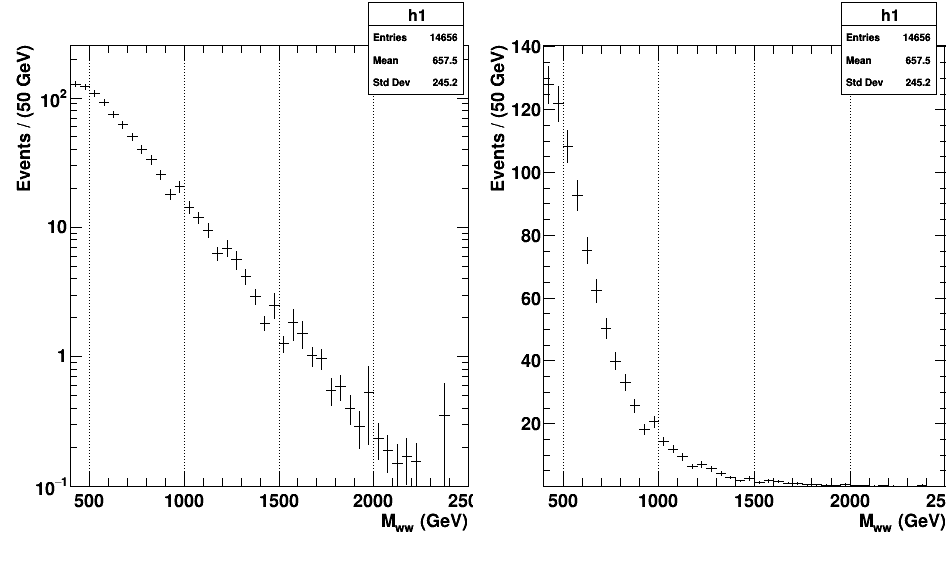

In [5]:
#c = r.TCanvas("c", "canvas", 800, 600)

h1 = r.TH1F("h1","",42,400,2500)
h1.SetMinimum(0.1)
h1.GetXaxis().SetTitle("M_{ww} (GeV)")
h1.GetYaxis().SetTitle("Events / ("+str((2500-400)/42)+" GeV)")
h1.SetTitleOffset(1.5,"Y")
h1.Sumw2()
treeIn.Draw("mass_lvj_type0>>h1",cutString_SideBand)
c,pad1,pad2 = createCanvasPads()
c.cd()
pad1.cd()
h1.Draw()
pad2.cd()
h1.Draw()
c.Draw()
print "Entries = ",h1.GetEntries()

In [6]:
rrv_x = r.RooRealVar("rrv_x","WW invariant mass",400,2500);
dh =  r.RooDataHist("dh","plotOn test data with x",r.RooArgList(rrv_x),h1)

---

---

## First Function

$$f_{ErfPow2} = s^{-(c_0 + c_1 \times Log(s))} \times \frac{1}{2} \times (1+Erf(\frac{x-offset}{width}))$$

where, $s = \frac{x}{2000}$

**Notes:**
1. by tuning parameter $c_o$ and $c_1$ tail can be optimized.
2. To tune the peak: presently no idea!!

---

---

In [10]:
rrv_c0_sb     = r.RooRealVar("rrv_c0_sb","rrv_c0_sb",15.61,0.,50) 
rrv_c1_sb     = r.RooRealVar("rrv_c1_sb","rrv_c1_sb",2.197,0,5)
rrv_offset_sb = r.RooRealVar("rrv_offset_sb","rrv_offset_sb",-5630,-6000,-400)
rrv_width_sb  = r.RooRealVar("rrv_width_sb","rrv_width_sb",-5542,-8000,-4000.0)
            
model_pdf = r.RooErfPow2Pdf("model_pdf","model_pdf",rrv_x,rrv_c0_sb,rrv_c1_sb,rrv_offset_sb,rrv_width_sb)
rfresult = model_pdf.fitTo(dh,r.RooFit.Save(1), r.RooFit.NumCPU(4))
rfresult = model_pdf.fitTo(dh,r.RooFit.Save(1), r.RooFit.NumCPU(4))


frame = rrv_x.frame() 
dh.plotOn(frame)

model_pdf.plotOn(frame, r.RooFit.LineColor(2))
model_pdf.paramOn(frame)

rfresult.Print()

 **********
 **   21 **SET PRINT           1
 **********
 **********
 **   22 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c0_sb    1.56100e+01  5.00000e+00    0.00000e+00  5.00000e+01
     2 rrv_c1_sb    2.19700e+00  5.00000e-01    0.00000e+00  5.00000e+00
     3 rrv_offset_sb  -5.63000e+03  1.85000e+02   -6.00000e+03 -4.00000e+02
     4 rrv_width_sb  -5.54200e+03  4.00000e+02   -8.00000e+03 -4.00000e+03
 **********
 **   23 **SET ERR         0.5
 **********
 **********
 **   24 **SET PRINT           1
 **********
 **********
 **   25 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   26 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=5583.34 FROM MIGRAD    STATUS=INITIATE      153 CALLS         154 TOTAL
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file mWW_withpull.png has been created


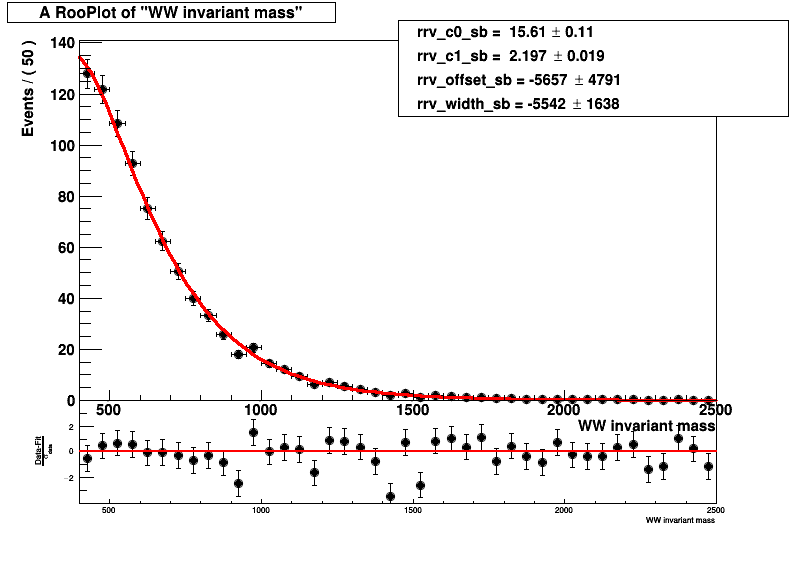

In [11]:
c,pad1,pad2 = pullCanvas()
pad2.cd()
frame.Draw()
pad1.cd()
hpull = get_pull(rrv_x,frame)
hpull.Draw("AP")
medianLine = r.TLine(frame.GetXaxis().GetXmin(),0.,frame.GetXaxis().GetXmax(),0.); medianLine.SetLineWidth(2); medianLine.SetLineColor(2);
medianLine.Draw()
c.Draw()
c.SaveAs("mWW_withpull.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file mWW_withpull_log.png has been created


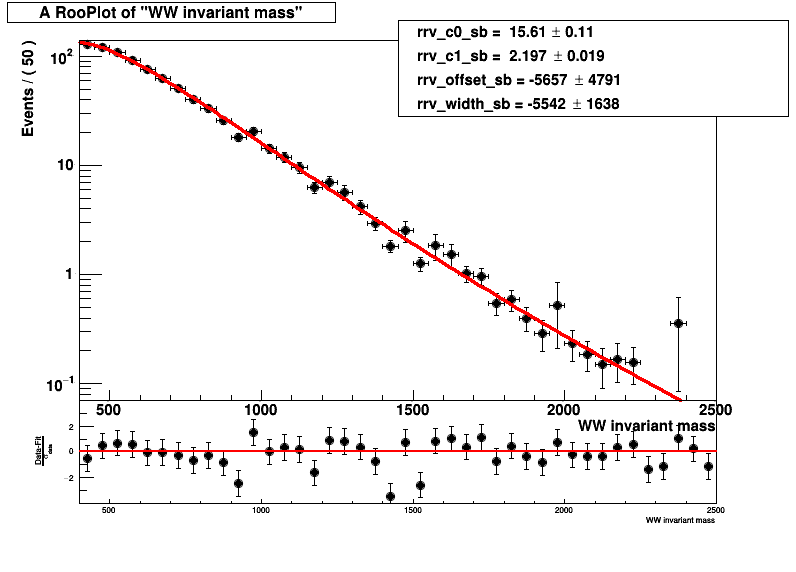

In [12]:
c,pad1,pad2 = pullCanvas()
pad2.cd()
pad2.SetLogy(1)
frame.Draw()
pad1.cd()
hpull = get_pull(rrv_x,frame)
hpull.Draw("AP")
medianLine = r.TLine(frame.GetXaxis().GetXmin(),0.,frame.GetXaxis().GetXmax(),0.); medianLine.SetLineWidth(2); medianLine.SetLineColor(2);
medianLine.Draw()
c.Draw()
c.SaveAs("mWW_withpull_log.png")

---

---

## Second Function

$$f_{ErfPow3} = s^{-(c_0 + c_1 \times Log(s) + c_2 \times Log(s)) \times Log(s)} \times \frac{1}{2} \times (1+Erf(\frac{x-offset}{width}))$$

where, $s = \frac{x}{13000}$

**Notes:**
1. by tuning parameter $c_o$ and $c_1$ tail can be optimized.
2. To tune the peak: presently no idea!!

---

---

---

---

## Third Function

$$f_{ErfPowExp} = s^{-c_1Log(s)} \times e^{c_0s} \times \frac{1}{2} \times (1+Erf(\frac{x-offset}{width}))$$

where, $s = \frac{x}{13000}$

**Notes:**
1. by tuning parameter $c_o$ and $c_1$ tail can be optimized.
2. To tune the peak: presently no idea!!

---

---